In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import export_text, plot_tree

In [2]:
df = pd.read_csv('C:/Users/JSWIFT1/OneDrive - Knex/Downloads/sample_points7.csv')

print("Data shape:", df.shape)
print("Data statistics:")
print(df.describe())

Data shape: (196, 2)
Data statistics:
              dNBR
count   196.000000
mean   2182.178571
std    1364.499639
min    -469.000000
25%     884.500000
50%    2251.500000
75%    3273.250000
max    4886.000000


In [3]:
X = df['dNBR']
y = df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train.to_frame(), y_train)


y_pred = model.predict(X_test.to_frame())


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[14  1  0  0]
 [ 1  4  1  4]
 [ 2  1  8  0]
 [ 0  2  1  1]]

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.93      0.87        15
         Low       0.50      0.40      0.44        10
    Moderate       0.80      0.73      0.76        11
    Unburned       0.20      0.25      0.22         4

    accuracy                           0.68        40
   macro avg       0.58      0.58      0.58        40
weighted avg       0.67      0.68      0.67        40



In [4]:

tree_text = export_text(model, feature_names=['dNBR'])
print("Model Text:")
print(tree_text)

Model Text:
|--- dNBR <= 2435.00
|   |--- dNBR <= 1031.50
|   |   |--- dNBR <= 330.50
|   |   |   |--- dNBR <= 187.00
|   |   |   |   |--- class: Unburned
|   |   |   |--- dNBR >  187.00
|   |   |   |   |--- dNBR <= 209.00
|   |   |   |   |   |--- class: Moderate
|   |   |   |   |--- dNBR >  209.00
|   |   |   |   |   |--- class: Unburned
|   |   |--- dNBR >  330.50
|   |   |   |--- dNBR <= 589.50
|   |   |   |   |--- dNBR <= 449.50
|   |   |   |   |   |--- dNBR <= 405.00
|   |   |   |   |   |   |--- dNBR <= 387.00
|   |   |   |   |   |   |   |--- class: Low
|   |   |   |   |   |   |--- dNBR >  387.00
|   |   |   |   |   |   |   |--- class: Unburned
|   |   |   |   |   |--- dNBR >  405.00
|   |   |   |   |   |   |--- class: Low
|   |   |   |   |--- dNBR >  449.50
|   |   |   |   |   |--- dNBR <= 481.00
|   |   |   |   |   |   |--- class: Unburned
|   |   |   |   |   |--- dNBR >  481.00
|   |   |   |   |   |   |--- dNBR <= 535.00
|   |   |   |   |   |   |   |--- dNBR <= 500.50
|   |   |

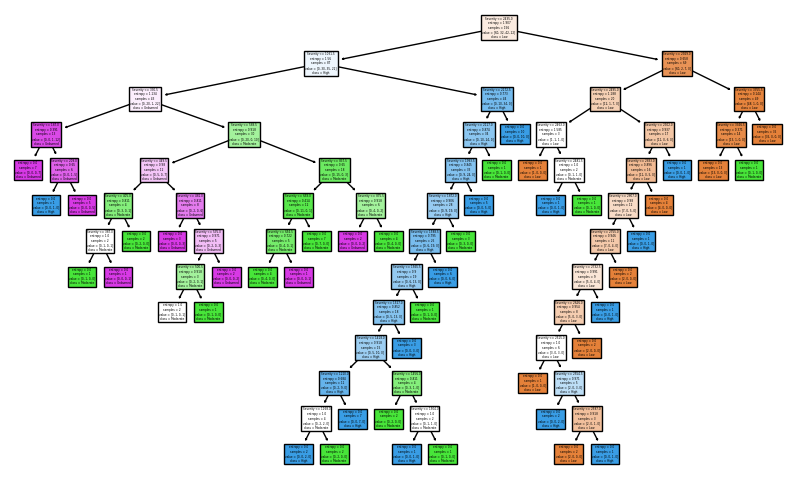

Confusion Matrix (Max Depth = 1):
[[14  0  1  0]
 [ 1  0  9  0]
 [ 3  0  8  0]
 [ 0  0  4  0]]

Classification Report (Max Depth = 1):
              precision    recall  f1-score   support

        High       0.78      0.93      0.85        15
         Low       0.00      0.00      0.00        10
    Moderate       0.36      0.73      0.48        11
    Unburned       0.00      0.00      0.00         4

    accuracy                           0.55        40
   macro avg       0.29      0.42      0.33        40
weighted avg       0.39      0.55      0.45        40



C:\Users\JSWIFT1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JSWIFT1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JSWIFT1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:

plt.figure(figsize=(10, 6))


plot_tree(model, feature_names=['Severity'], class_names=['Low', 'Moderate', 'High', 'Unburned'], filled=True)

plt.show()


model_depth_1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
model_depth_1.fit(X_train.to_frame(), y_train)

y_pred_depth_1 = model_depth_1.predict(X_test.to_frame())

print("Confusion Matrix (Max Depth = 1):")
print(confusion_matrix(y_test, y_pred_depth_1))
print("\nClassification Report (Max Depth = 1):")
print(classification_report(y_test, y_pred_depth_1))

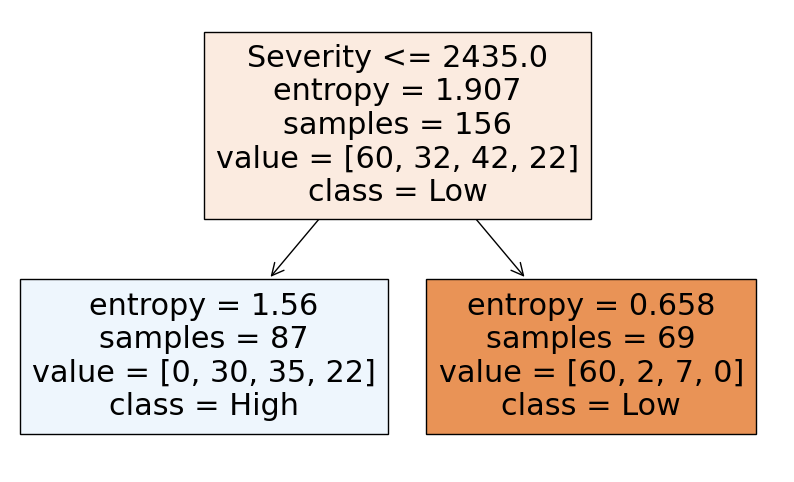

Confusion Matrix (Max Depth = 3):
[[14  0  1  0]
 [ 1  5  1  3]
 [ 3  0  8  0]
 [ 0  2  0  2]]

Classification Report (Max Depth = 3):
              precision    recall  f1-score   support

        High       0.78      0.93      0.85        15
         Low       0.71      0.50      0.59        10
    Moderate       0.80      0.73      0.76        11
    Unburned       0.40      0.50      0.44         4

    accuracy                           0.73        40
   macro avg       0.67      0.67      0.66        40
weighted avg       0.73      0.72      0.72        40



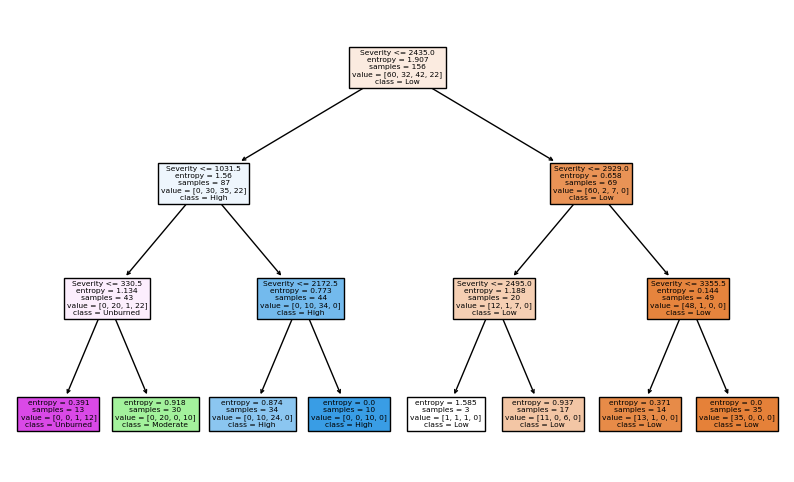

In [13]:
plt.figure(figsize=(10, 6))
plot_tree(model_depth_1, feature_names=['Severity'], class_names=['Low', 'Moderate', 'High', 'Unburned'], filled=True)
plt.show()


model_depth_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_depth_3.fit(X_train.to_frame(), y_train)

y_pred_depth_3 = model_depth_3.predict(X_test.to_frame())

print("Confusion Matrix (Max Depth = 3):")
print(confusion_matrix(y_test, y_pred_depth_3))
print("\nClassification Report (Max Depth = 3):")
print(classification_report(y_test, y_pred_depth_3))

plt.figure(figsize=(10, 6))
plot_tree(model_depth_3, feature_names=['Severity'], class_names=['Low', 'Moderate', 'High', 'Unburned'], filled=True)
plt.show()